In [1]:
import numpy as np
import pandas as pd

from cvxopt import solvers
solvers.options['show_progress'] = False

import sys
sys.path.append("../graph_signal_processing")

from graph_generator import line_graph, grid_graph, rbf_random_graph, er_random_graph
from graph_signal_generator import smooth_signal_generator
from gls_sig_rep import GLSigRep
from metrics import F1_score

import matplotlib.pyplot as plt

# Generating smooth graphs

lalallalalala

# Learning graphs

In [2]:
n_samples = 1000 # number of signals simulated for each graph
n_steps = 100 # number of maximum steps 
n_trials = 5 # number of trials for each graph and each set of parameters

# hyperparameters for the grid search
alpha_ = np.logspace(-6, 1, 8)
beta_ = np.logspace(-4, 1, 6)
threshold_ = np.logspace(-3, -1, 3)

## Line graph

In [3]:
L = line_graph(16)

list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.
for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples = smooth_signal_generator(L, n_samples)
            pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=beta, alpha=alpha)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
                
results_line = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
        

alpha : 1e-06; beta : 0.0001; threshold : 0.001 --> F1 = 1.0


## Grid graph

In [4]:
L = grid_graph(16)

list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.
for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples = smooth_signal_generator(L, n_samples)
            pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=beta, alpha=alpha)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
                
results_grid = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
        

alpha : 1e-06; beta : 0.0001; threshold : 0.001 --> F1 = 0.8987174066243833
alpha : 0.0001; beta : 0.01; threshold : 0.001 --> F1 = 0.9232000490241138


## Rbf random graph

In [5]:
L = grid_graph(16)

list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.
for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples = smooth_signal_generator(L, n_samples)
            pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=beta, alpha=alpha)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
                
results_rbf = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
        

alpha : 1e-06; beta : 0.0001; threshold : 0.001 --> F1 = 0.8720507399577168
alpha : 1e-05; beta : 0.001; threshold : 0.001 --> F1 = 0.9033242726265982
alpha : 0.0001; beta : 0.01; threshold : 0.001 --> F1 = 0.9072840203274986
alpha : 0.01; beta : 1.0; threshold : 0.001 --> F1 = 0.9086398872445385


# Some visualizations

## Line graph

In [6]:
L = line_graph(16)
samples = smooth_signal_generator(L, n_samples)
pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1e-4, alpha=1e-6)

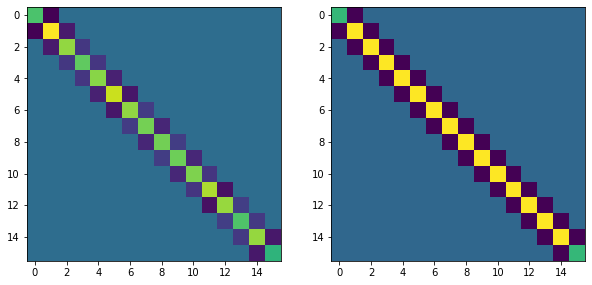

In [7]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(pred_L)
plt.subplot(1, 2, 2)
plt.imshow(L)

# Grid graph

In [8]:
L = grid_graph(16)
samples = smooth_signal_generator(L, n_samples)
pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1e-2, alpha=1e-4)

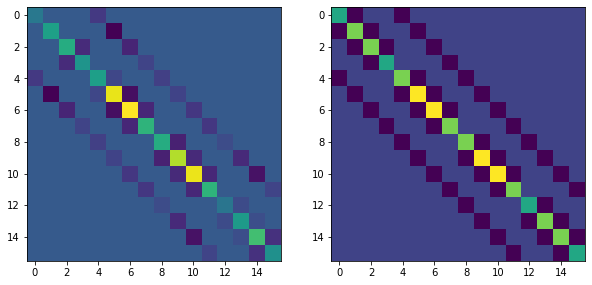

In [9]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(pred_L)
plt.subplot(1, 2, 2)
plt.imshow(L)

## Rbf random 

In [10]:
L = rbf_random_graph(16)
samples = smooth_signal_generator(L, n_samples)
pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1, alpha=1e-2)

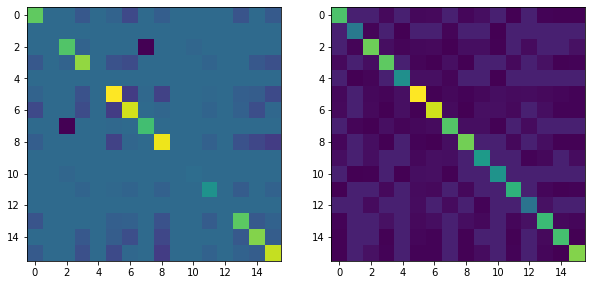

In [11]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(pred_L)
plt.subplot(1, 2, 2)
plt.imshow(L)